In [1]:
#imports
import torch
import cv2
import pandas as pd
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
#given code
def image_arrs(paths, im_arr):
    for path in paths:
        image = cv2.imread(path)
        image_from_array = Image.fromarray(image, 'RGB')
        #resize
        size_image = image_from_array.resize((30,30))
        image_arr = np.array(size_image.getdata(),np.uint8).reshape(size_image.size[1], size_image.size[0],3)
        im_arr.append(image_arr.flatten())
    return im_arr

In [3]:
df = pd.read_csv('Train.csv')

paths1 = df[(df['ClassId'] ==1)]['Path'].values
paths2 = df[(df['ClassId'] ==2)]['Path'].values
paths3 = df[(df['ClassId'] ==3)]['Path'].values
paths4 = df[(df['ClassId'] ==4)]['Path'].values
paths5 = df[(df['ClassId'] ==5)]['Path'].values
paths6 = df[(df['ClassId'] ==6)]['Path'].values
paths7 = df[(df['ClassId'] ==7)]['Path'].values
paths8 = df[(df['ClassId'] ==8)]['Path'].values
paths9 = df[(df['ClassId'] ==9)]['Path'].values
paths10 = df[(df['ClassId'] ==10)]['Path'].values

class1_arrs = []
class1_arrs = image_arrs(paths1, class1_arrs)

class2_arrs = []
class2_arrs = image_arrs(paths2, class2_arrs)

class3_arrs = []
class3_arrs = image_arrs(paths3, class3_arrs)

class4_arrs = []
class4_arrs = image_arrs(paths4, class4_arrs)

class5_arrs = []
class5_arrs = image_arrs(paths5, class5_arrs)

class6_arrs = []
class6_arrs = image_arrs(paths6, class6_arrs)

class7_arrs = []
class7_arrs = image_arrs(paths7, class7_arrs)

class8_arrs = []
class8_arrs = image_arrs(paths8, class8_arrs)

class9_arrs = []
class9_arrs = image_arrs(paths9, class9_arrs)

class10_arrs = []
class10_arrs = image_arrs(paths10, class10_arrs)


In [4]:
X = class1_arrs + class2_arrs + class3_arrs + class4_arrs + class5_arrs + class6_arrs \
        + class7_arrs + class8_arrs + class9_arrs + class10_arrs
y = (len(class1_arrs)*[0]) + (len(class2_arrs)*[1]) + (len(class3_arrs)*[2]) + (len(class4_arrs)*[3]) + \
        (len(class5_arrs)*[4]) + (len(class6_arrs)*[5]) + (len(class7_arrs)*[6]) + (len(class8_arrs)*[7]) \
        + (len(class9_arrs)*[8]) + (len(class10_arrs)*[9])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.2, random_state = 0)

In [6]:
#scale the data with standard scaler
print(X_train[0][:10])
print(X_test[0][:10])
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train[0][:10])
print(X_test[0][:10])

[ 88 150 142  41  92  79 186 255 255  57]
[30 32 32 33 34 33 44 45 43 62]
[ 0.15489286  1.00488422  0.87876101 -0.47307698  0.21156901  0.0112295
  1.45942137  2.42752187  2.41155529 -0.26284777]
[-0.62202965 -0.60788137 -0.63167396 -0.57999813 -0.57924894 -0.6208428
 -0.43474491 -0.42931788 -0.48719386 -0.19603754]


In [7]:
#given code - convert from np array to tensor
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).long()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).long()

In [8]:
train_data = [(X_train[i], y_train[i]) for i in range(len(X_train))]
test_data = [(X_test[i], y_test[i]) for i in range(len(X_test))]

print(len(train_data))

#18 24 27 36 54

13176


In [9]:
#create training and testing sets
   
trainset = torch.utils.data.DataLoader(train_data, batch_size=36, shuffle=True)
testset = torch.utils.data.DataLoader(test_data, batch_size=36, shuffle=True)

In [10]:
print(trainset)

In [11]:
total = 0
for each in trainset:
    total += 1
print(total)

366


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(6)


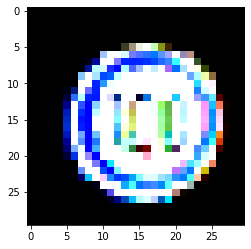

In [12]:
x, y = each[0][5], each[1][5]
print(y)
plt.imshow(x.view(30,30,3))
plt.show()

<h3> Building NN

In [37]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2700,60)
        self.fc2 = nn.Linear(60,60)
        self.fc4 = nn.Linear(60,60)
        self.fc5 = nn.Linear(60,30)
        self.fc6 = nn.Linear(30,10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.fc6(x)
        
        return F.log_softmax(x, dim=1)
    
net = Net()

In [38]:
optimizer = optim.Adam(net.parameters(), lr=0.00004, weight_decay=0.00005)
criterion = nn.CrossEntropyLoss()

EPOCHS = 200
loss_vals = []
train_accs= []
test_accs = []
correct1 = 0
total1 = 0
correct2 = 0
total2 = 0

for epoch in range(EPOCHS):
    for data in trainset:
        X,y = data
        #want gradient to be 0 each time
        net.zero_grad()
        output = net(X.view(-1,2700))
        loss = criterion(output, y)
        #backpropagating the loss
        loss.backward()
        #taking the steps to decrease loss
        optimizer.step()
    if epoch%10 == 0: print(loss)
    loss_vals.append(loss)
    
    pred = net.forward(X_train)
    pred = torch.argmax(pred, axis=1)
    train_acc = torch.sum(pred==y_train).float()/len(pred)
#         print('training accuracy:', train_acc.item())
    train_accs.append(train_acc.item())
    test_pred = net.forward(X_test)
    test_pred = torch.argmax(test_pred, axis=1)
    test_acc = torch.sum(test_pred==y_test).float()/len(test_pred)
#         print('test accuracy:', test_acc.item())
    test_accs.append(test_acc.item())
    
print('Train Acc', train_accs[-1])
print('Test Acc', test_accs[-1])

tensor(2.1360, grad_fn=<NllLossBackward>)
tensor(0.9729, grad_fn=<NllLossBackward>)
tensor(0.3695, grad_fn=<NllLossBackward>)
tensor(0.2953, grad_fn=<NllLossBackward>)
tensor(0.2824, grad_fn=<NllLossBackward>)
tensor(0.3396, grad_fn=<NllLossBackward>)
tensor(0.1000, grad_fn=<NllLossBackward>)
tensor(0.3463, grad_fn=<NllLossBackward>)
tensor(0.1589, grad_fn=<NllLossBackward>)
tensor(0.1388, grad_fn=<NllLossBackward>)
tensor(0.0334, grad_fn=<NllLossBackward>)
tensor(0.0532, grad_fn=<NllLossBackward>)
tensor(0.0699, grad_fn=<NllLossBackward>)
tensor(0.1100, grad_fn=<NllLossBackward>)
tensor(0.0607, grad_fn=<NllLossBackward>)
tensor(0.0174, grad_fn=<NllLossBackward>)
tensor(0.0934, grad_fn=<NllLossBackward>)
tensor(0.2970, grad_fn=<NllLossBackward>)
tensor(0.2429, grad_fn=<NllLossBackward>)
tensor(0.0054, grad_fn=<NllLossBackward>)
Train Acc 0.9955980777740479
Test Acc 0.9335154891014099


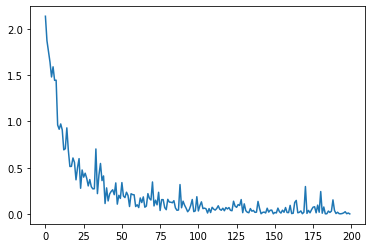

In [39]:
plt.plot(loss_vals)

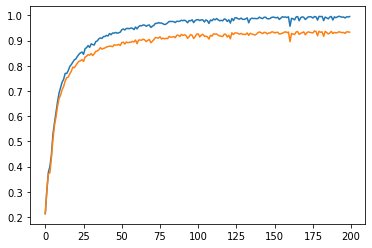

In [40]:
plt.plot(train_accs, label='Train Accuracy')
plt.plot(test_accs, label='Test Accuracy')
plt.show()

In [41]:
#see training accuracy
correct = 0
total = 0

with torch.no_grad():
    
    for data in trainset:
        X,y = data
        output = net(X.view(-1, 2700))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct+=1
            total+=1

print('Train Accuracy: ', round(correct/total, 3))

#for test
correct = 0
total = 0
test_accs = []

with torch.no_grad():
    for data in testset:
        X,y = data
        output = net(X.view(-1,2700))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct+=1
            total+=1
        test_accs.append(correct/total)

print('Test accuracy: ', round(correct/total, 3))

Train Accuracy:  0.996
Test accuracy:  0.934
